In [1]:
import pandas as pd

In [2]:
# Import SparkConf class into program
from pyspark import SparkConf

# local[*]: run Spark in local mode with as many working processors as logical cores on your machine
# If we want Spark to run locally with 'k' worker threads, we can specify as "local[k]".
master = "local[*]"
# The `appName` field is a name to be shown on the Spark cluster UI page
app_name = "Parallel Join"
# Setup configuration parameters for Spark
spark_conf = SparkConf().setMaster(master).setAppName(app_name)

# Import SparkSession classes 
from pyspark.sql import SparkSession # Spark SQL

spark = SparkSession.builder.config(conf=spark_conf).getOrCreate()

22/12/15 14:59:57 WARN Utils: Your hostname, crarojasca-Blade-14-RZ09-0370 resolves to a loopback address: 127.0.1.1; using 118.139.64.86 instead (on interface wlp2s0)
22/12/15 14:59:57 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/12/15 14:59:57 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
file = "datasets/omm_export_tweets_01-06-2022.csv"
data = spark.read.options(delimiter="\t").csv(file, header=True)

In [4]:
data.limit(10).toPandas()

,id,username,fulltext,140_char_text,hashtags,url,domain,retweet_count,favorite_count,language,...,user_follower_count,user_favorite_count,user_tweet_count,user_description,media,year,month,day,hour,minute
0,1531787611236315137,market_forces,Melinda is switching from @HESTASuper to anoth...,Melinda is switching from @HESTASuper to anoth...,[],https://twitter.com/i/web/status/1531787611236...,twitter.com,8,13,en,...,13569,2442,12764,"Activism to shift banks, superannuation and in...",None,2022,6,1,0,0
1,1531787616869294080,ORF_CNED,"How does the #UkraineCrisis, the #pandemic, an...","How does the #UkraineCrisis, the #pandemic, an...","[{'text': 'UkraineCrisis', 'indices': [13, 27]...",https://twitter.com/i/web/status/1531787616869...,twitter.com,2,3,en,...,1327,32,8351,None,None,2022,6,1,0,0
2,1531787614881292288,TackleWith,Climate Change: Tech Billionaire Wins Battle A...,Climate Change: Tech Billionaire Wins Battle A...,[],https://www.theglobeandmail.com/investing/mark...,www.theglobeandmail.com,0,1,en,...,110,28,1422,Tackle Climate Change With Technology is a kno...,None,2022,6,1,0,0
3,1531787618060357632,Speakeasy_Co,The newest drinking public—#millennials and #G...,The newest drinking public—#millennials and #G...,"[{'text': 'millennials', 'indices': [27, 39]},...",https://twitter.com/i/web/status/1531787618060...,twitter.com,0,0,en,...,122,48,292,We offer an integrated direct-to-consumer solu...,None,2022,6,1,0,0
4,1531787628030398465,WevolverApp,With two-thirds of the impact of aviation on c...,With two-thirds of the impact of aviation on c...,[],https://twitter.com/i/web/status/1531787628030...,twitter.com,0,2,en,...,23172,27241,32442,A community and platform providing engineers a...,None,2022,6,1,0,0
5,1531787627858382849,PeopleinAg,"Farmers battling climate change welcome Labor,...","Farmers battling climate change welcome Labor,...",[],https://buff.ly/38tBLHV,buff.ly,0,0,en,...,27,0,446,Developed by key members from across the Ag se...,https://pbs.twimg.com/media/FUIAuroXoAEDOUm.jpg,2022,6,1,0,0
6,1531787636179972098,TakingRoot,Taking Root is #hiring! 💼We have 4 openings in...,Taking Root is #hiring! 💼We have 4 openings in...,"[{'text': 'hiring', 'indices': [15, 22]}]",https://twitter.com/i/web/status/1531787636179...,twitter.com,0,0,en,...,852,197,1681,Our purpose is to accelerate the restoration o...,None,2022,6,1,0,0
7,1531787640504487936,Jim_Pembroke,"And watch Bolt, pleading, begging with Dutton ...","And watch Bolt, pleading, begging with Dutton ...","[{'text': 'DuttonDressedAsLamb', 'indices': [7...",https://twitter.com/i/web/status/1531787640504...,twitter.com,5,9,en,...,7524,11037,34031,"Retired, living on a boat and trying to keep m...",None,2022,6,1,0,0
8,1531787643243139075,MyZeroCarbon,.Forests will be our allies in the fight again...,.Forests will be our allies in the fight again...,"[{'text': 'climatechange', 'indices': [50, 64]...",https://www.earth.com/news/forests-will-be-our...,www.earth.com,3,1,en,...,3689,260,3753,#climatechange ~ advice on reducing your #carb...,None,2022,6,1,0,0
9,1531787662994055169,DavidLy50171905,"@VenusianAndroid Yes it can get even worse, si...","@VenusianAndroid Yes it can get even worse, si...",[],https://twitter.com/i/web/status/1531787662994...,twitter.com,0,1,en,...,2487,24313,20173,We all are one species sharing one planet and ...,None,2022,6,1,0,0


In [5]:
data.describe().toPandas()

22/12/15 15:02:13 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,summary,id,username,fulltext,140_char_text,hashtags,url,domain,retweet_count,favorite_count,...,user_follower_count,user_favorite_count,user_tweet_count,user_description,media,year,month,day,hour,minute
0,count,5236660,5236660,5221751,5236660,5200654,4100231,4100320,5201668,5201668,...,5200729,5200729,5200606,4483842,143882,5199529,5199529,5199529,5199529,5196331
1,mean,1.56585970844243686E18,Infinity,None,None,None,2018.5220667384285,29.426979898280454,1.4145793234016473,5.784409202410558,...,4477.441226604962,16345.935325413033,18953.83023413626,Infinity,2020.7540625,2020.761649372472,8.58183289294088,15.80488636566889,12.794348680428554,28.838842637237697
2,stddev,1.901330268208338E16,NaN,None,None,None,66.23094877045271,1173.2247514443911,40.76279864901177,111.79528112178657,...,12650.413209372125,22039.689724376643,22767.883204329184,NaN,49.82972396251582,49.91752152045043,1.753547521577907,8.786236569059868,6.452466321855112,17.56658895239886
3,min,1531787611236315137,0000000_fucks,#Climatechange is just a bumber sticker. Mali...,"... And this is a climate change issue, of c...",None,2022,0,0,0,...,0,0,"""A change agent with the soul of an alt-weekly...", 00/,2022,10,1,0,0,0
4,max,1600641286909747200,zzzzzzzzzzzzane,🫶🏼⁦@ajeansu⁩ ⁦@Maya4EJ⁩ ⁦@drvolts⁩ 🙏 for this ...,🫶🏼⁦@ajeansu⁩ ⁦@Maya4EJ⁩ ⁦@drvolts⁩ 🙏 for this ...,https://youtu.be/YVCUWwKjihQ,youtu.be,zwingliusredivivus.wordpress.com,999,ㅤㅤ The whole 𝗪𝗢𝗥𝗟𝗗 has gone wrong.ㅤㅤㅤ ㅤㅤ B...,...,9999,9999,🪶Native/Satire/Science Tech Geek/Facts Matter/...,"󾓩 Flow with your surroundings, don't fight. M...",https://pbs.twimg.com/tweet_video_thumb/Fjac-5...,9,9,9,9,9


In [6]:
import pyspark.sql.functions as F

data = data.withColumn("text_len", F.length("fulltext"))

In [7]:
data.printSchema()

root
 |-- id: string (nullable = true)
 |-- username: string (nullable = true)
 |-- fulltext: string (nullable = true)
 |-- 140_char_text: string (nullable = true)
 |-- hashtags: string (nullable = true)
 |-- url: string (nullable = true)
 |-- domain: string (nullable = true)
 |-- retweet_count: string (nullable = true)
 |-- favorite_count: string (nullable = true)
 |-- language: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- lon: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- user_location: string (nullable = true)
 |-- user_time_zone: string (nullable = true)
 |-- user_follower_count: string (nullable = true)
 |-- user_favorite_count: string (nullable = true)
 |-- user_tweet_count: string (nullable = true)
 |-- user_description: string (nullable = true)
 |-- media: string (nullable = true)
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day: string (nullable = true)
 |-- hour: string (nullable = true)
 |-- minute: 

In [8]:
data = data.withColumn('date', F.to_date(F.concat_ws('-', data.year, data.month, data.day)))

In [9]:
data.limit(5).toPandas()

,id,username,fulltext,140_char_text,hashtags,url,domain,retweet_count,favorite_count,language,...,user_tweet_count,user_description,media,year,month,day,hour,minute,text_len,date
0,1531787611236315137,market_forces,Melinda is switching from @HESTASuper to anoth...,Melinda is switching from @HESTASuper to anoth...,[],https://twitter.com/i/web/status/1531787611236...,twitter.com,8,13,en,...,12764,"Activism to shift banks, superannuation and in...",None,2022,6,1,0,0,249,2022-06-01
1,1531787616869294080,ORF_CNED,"How does the #UkraineCrisis, the #pandemic, an...","How does the #UkraineCrisis, the #pandemic, an...","[{'text': 'UkraineCrisis', 'indices': [13, 27]...",https://twitter.com/i/web/status/1531787616869...,twitter.com,2,3,en,...,8351,None,None,2022,6,1,0,0,262,2022-06-01
2,1531787614881292288,TackleWith,Climate Change: Tech Billionaire Wins Battle A...,Climate Change: Tech Billionaire Wins Battle A...,[],https://www.theglobeandmail.com/investing/mark...,www.theglobeandmail.com,0,1,en,...,1422,Tackle Climate Change With Technology is a kno...,None,2022,6,1,0,0,105,2022-06-01
3,1531787618060357632,Speakeasy_Co,The newest drinking public—#millennials and #G...,The newest drinking public—#millennials and #G...,"[{'text': 'millennials', 'indices': [27, 39]},...",https://twitter.com/i/web/status/1531787618060...,twitter.com,0,0,en,...,292,We offer an integrated direct-to-consumer solu...,None,2022,6,1,0,0,277,2022-06-01
4,1531787628030398465,WevolverApp,With two-thirds of the impact of aviation on c...,With two-thirds of the impact of aviation on c...,[],https://twitter.com/i/web/status/1531787628030...,twitter.com,0,2,en,...,32442,A community and platform providing engineers a...,None,2022,6,1,0,0,274,2022-06-01


In [21]:
grouped_dates = data.na.drop("all").groupby("date").count().toPandas()

In [25]:
grouped_dates = grouped_dates.sort_values(by="date")

Text(0.5, 0, 'Date')

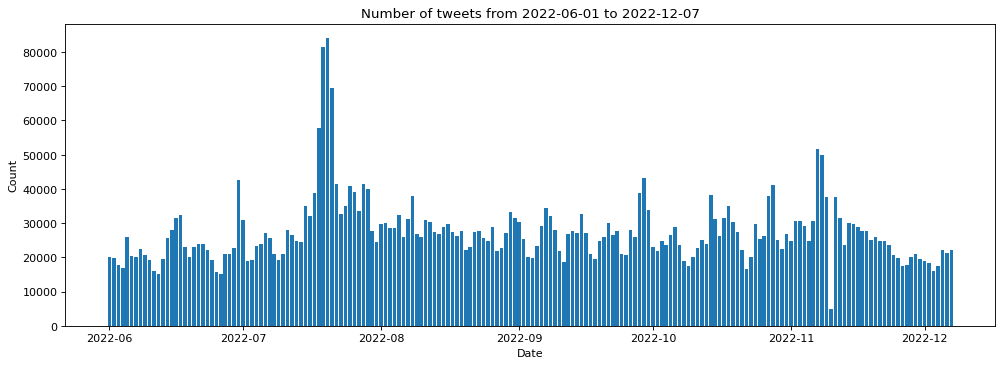

In [46]:
import matplotlib.pyplot as plt

initial_date = grouped_dates.date.dropna().min()
final_date = grouped_dates.date.dropna().max()

fig = plt.figure(figsize=(15, 5), dpi=80)
plt.bar(grouped_dates["date"], grouped_dates["count"])  # density=False would make counts
plt.title(f"Number of tweets from {initial_date} to {final_date}")
plt.ylabel('Count')
plt.xlabel('Date')

In [48]:
grouped_dates.loc[grouped_dates["count"].idxmax()]

date     2022-07-20
count         84067
Name: 51, dtype: object